#**7-1 인공신경망**

- 딥러닝과 인공 신경망 알고리즘 이해
- **텐서플로(TensorFlow)**를 사용한 간단한 인공 신경망 모델 생성

- 사용 데이터 : 패션 MNIST 데이터 셋
  - **패션 MNIST**: 딥러닝에서 유명한 데이터 셋. 손으로 쓴 0 ~ 9까지의 숫자로 이루어짐. MNIST와 크기 개수가 동일하지만 패션 아이템으로 이루어진 데이터

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
# load_data() 함수: 훈련데이터와 테스트 데이터를 나누어 반환

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)
# 훈련데이터 : 60,000개의 이미지 & 28*28 크기
# 타깃데이터 : 60,000개의 1차원 배열
print(test_input.shape, test_target.shape)
# 테스트데이터 : 10,000개의 이미지 & 28*28 크기

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


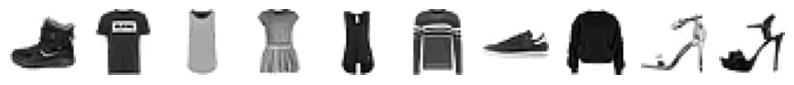

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [4]:
# 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력
print([train_target[i] for i in range(10)])
# 티셔츠(0), 바지(1), 스웨터(2), 드레스(3), 코트(4), 샌달(5), 셔츠(6), 스니커즈(7), 가방(8), 앵글부츠(9)

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
#레이블 당 샘플 개수
import numpy as np
print('레이블 당 샘플 개수: ', np.unique(train_target, return_counts=True))

레이블 당 샘플 개수:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#**로지스틱 회귀로 패션 아이템 분류**

- 4장에서 SGDClassifier 클래스의 loss 매개변수를 'log_loss'로 지정해 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델 생성

- SGDClassifier를 사용할 때 표준화 전처리된 데이터를 사용함.
  - why? 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향으로 이동.
  - If 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려 갈 수 없기 때문

- SGDClassifier은 2차원 입력을 못 다루기 때문에 1차원 배열로 만들어야 함

In [6]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print('변환된 크기 확인: ', train_scaled.shape)

변환된 크기 확인:  (60000, 784)


In [7]:
from sklearn.model_selection import cross_validate as CV
from sklearn.linear_model import SGDClassifier as SGDC
sc = SGDC(loss='log_loss', max_iter = 5, random_state = 42) #max_iter 값 변경하여 반복 횟수를 증가시켜도 성능 향상 X
scores = CV(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


#**인공 신경망(Artificial Neural Network; ANN)**

**가장 기본적인 ANN은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같음**

<center>
<img src = https://drive.google.com/uc?id=14ugxsseoB6MsK2LEIkTyQ1wWAc-JTqFP>
<img src = https://drive.google.com/uc?id=1v7nYAdzsd_Jj8IGsDr2OW_r6dnyuQULI>

```
# 코드로 형식 지정됨
```



- **출력층(output layer)**: 클래스가 10개이므로 z1 ~ z10

- **뉴런(Neuron)| 유닛(unit)**: z 값을 계산하는 단위. 뉴런에서는 **선형계산**이 전부

- **입력층**: 784번째 픽셀에 해당 하는 x1 ~ x784까지

- 인공신경망은 1943년 워런 매컬러와 월터 피츠가 제안한 뉴런모델로 올라감 => **매컬러-피츠 뉴런**

- 인공 신경망 : 기존의 머신러닝 알고리즘이 잘 해결하지 못했던 문제에서 높은 성능을 발휘하는 새로운 종류의 머신러닝 알고리즘일 뿐

<center>
<img src = https://drive.google.com/uc?id=1pZbZjzTYhjohkTVxu6JbGMCjV8TJ40mM>
</center>

#**텐서플로와 케라스 소개**

**케라스(keras)**: 텐서플로의 고수준 API

**딥러닝 라이브러리 장점**: 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련.
- GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈을 많이 쓰는 인공 신경망에 큰 도움이 됨

**그래서 7,8,9장 사용 시 코랩 런타임 유형 GPU로 변경 필요**

- keras 라이브러리는 직접 GPU 연산을 수행하지 않음. 대신 GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용
  ex) 텐서플로가 케라스의 백엔드 중 하나.
  씨아노(Theano), CNTK와 같은 여러 딥러닝 라이브러리를 케라스 백엔드로 사용 가능.==> 이런 케라스(멀티-백엔드 케라스) but 이들은 모두 개발 중지
- 이제는 케라스와 텐서플로가 거의 동의어가 되었음.(다른 것들은 개발 중지 되어서)

In [8]:
import tensorflow as tf
from tensorflow import keras

#**인공 신경망으로 모델 만들기**

- 로지스틱 회귀에서는 교차 거증을 사용해 모델을 평가했지만,
- 인공신경망에서는 교차 검증을 잘 사용하지 않고 **검증 세트를 별도로 덜어내어 사용**

- **이유**:

1.   딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수 안정적
2.   교차 검증을 수행하기에는 훈련 시간이 김

**케라스의 레이어(keras.layers)** 패키지 안에는 다양한 층이 준비
- **밀집층(dense layer)**: 가장 기본이 되는 층
  - why? 784개의 픽셀과 10개의 뉴런이 있을 때 연결된 선 = 7,840개
- 모두 연결되어 있기 때문에 완전 연결층이라고도 함
- **활성화 함수**: 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수

- 좁은 개념의 신경망층 : 가중치와 절편으로 선형 계산을 수행하는 층
- 넓은 의미의 신경망층 : 소프트맥스 층

In [9]:
from sklearn.model_selection import train_test_split as TTS
train_scaled, val_scaled, train_target, val_target = TTS(
    train_scaled, train_target, test_size=0.2, random_state = 42 #훈련 세트에서 20%를 검증 세트로 덜어냄
)
print('훈련세트 크기: ', train_scaled.shape, train_target.shape)
print('검증세트 크기: ', val_scaled.shape, val_target.shape)

훈련세트 크기:  (48000, 784) (48000,)
검증세트 크기:  (12000, 784) (12000,)


- 10개의 패션아이템 So, 뉴런 개수 10
- **softmax**: 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해
  if 이진분류면 activation='sigmoid'로 설정
- input_shape(784, ): 10개의 뉴런이 각각 몇 개의 입력을 받는지(784개)

In [10]:
# 밀집층 생성 : 필요 매개변수 = 뉴런 개수, 뉴런 출력에 적용할 함수, 입력 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 밀집층을 가진 신경망 모델 생성: 케라스의 Sequential 클래스 사용
model = keras.Sequential(dense) # 모델 객체가 신경망 모델

<center>
<img src = https://drive.google.com/uc?id=1ozqYPVPVK0QZfDBydijv58AiQibJpQC2 length='1200', height='500'></center>

```
# 코드로 형식 지정됨
```



#**인공신경망으로 패션 아이템 분류하기**

**케라스 모델 훈련하기 전 설정 단계**
- model 객체의 complie() 메서드에서 수행
- **꼭 손실 함수 종류**를 지정해야함

- **이진분류**: loss = 'binary_crossentropy'
- **다중분류**: loss = 'categorical_crossentropy'

- 이진 분류에서는 출력층의 뉴런이 하나
  - 이 뉴런이 출력하는 확률값 a(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 크로스 엔트로피를 계산
  - 이 계산은 로지스틱 손실 함수와 동일
  - 양성 클래스에 대한 확률(a)만 출력함 So, 음성 클래스 확률(1-a)
  - 양성(1), 음성(1-a) ==> 하나의 뉴런만으로 양성/음성 클래스에 대한 크로스 엔트로피 손실을 모두 계산 가능
- 다중 분류의 경우
  - 각 클래스에 대한 확률이 모두 출력 So, 타깃 해당 확률만 남기기 위해 나머지 확률에는 모두 0을 곱함
  - **원-핫 인코딩**: 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것
  - So, 크로스 엔트로피 손실함수를 사용하려면 0,1,2와 같이 정수로 된 타깃값을 **원-핫 인코딩**으로 변환해야함

- **텐서플로**에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그대로 사용 가능
  - sparse_categorical_crossentropy: 정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것
  - 타깃값을 원-핫 인코딩으로 준비했다면 compile() 메소드에 손실함수를
    - compile() 메소드의 매개변수
      1. loss='categorical_crossentropy'로 지정
      2. metrics : 훈련할 때 기본으로 에포크마다 손실값을 출력해줌
      3. fit() : 입력(train_scaled)와 타깃(train_target), 반복할 에포크 횟수 epochs 매개변수로 지정
    - evaluate() 메소드: 케라스에서 모델의 성능을 평가하는 메서드


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [12]:
print("MNIST 타깃값: ", train_target[:10])

MNIST 타깃값:  [7 3 5 8 6 9 3 3 9 9]


In [13]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6095 - accuracy: 0.7923
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8483
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4373 - accuracy: 0.8518
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4305 - accuracy: 0.8549


In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.8527


[0.4323442876338959, 0.8526666760444641]

<center>
<img src = https://drive.google.com/uc?id=1qKa4d_BFZRLFxux8T1R3069RZz3yAh_H weight='1200' length='500'><br>
</center>

```
# 코드로 형식 지정됨
```



#**7-2 심층신경망**

**인공 신경망에 층을 여러 개 추가해 패션 MNIST 데이터셋을 분류하여 케라스로 심층 신경망 만들기**

#**2개의 층**

- **은닉층(hidden layer)**: 입력층과 출력층 사이에 있는 모든 층
- **활성화 함수**: 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
  - 소프트맥스 함수도 활성화 함수
- 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음
  - 이진 분류일 경우: 시그모이드 함수 사용
  - 다중 분류일 경우: 소프트맥스 함수 사용
  - 이에 비해 은닉층의 활성화 함수는 비교적 자유로움: 시그모이드 함수 & 볼 렐루(ReLU)함수 사용

- **분류 문제**를 위한 신경망의 출력층에는 시그모이드 함수 | 소프트맥스 함수 사용
- **회귀 문제**를 위한 신경망 출력층에는 출력이 임의의 어떤 숫자이므로 활성화 함수 적용 필요 X

즉, 출력층의 선형 방정식의 계산을 그대로 출력. 이렇게 하려면 Dense 층의 activation 매개변수에 아무런 값을 지정하지 않음

<center>
<img src = https://drive.google.com/uc?id=1ZYfwQvKJdW1Kqu6OD9KHQAILYDYGvvzh weight='1200',length='500'>
<br></center>

```
# 코드로 형식 지정됨
```



In [15]:
#from tensorflow import keras#
# (train_input, train_target), (test_input, test_target) =\
#  keras.datasets.fashion_mnist.load_data()
# from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import train_test_split as TTS

In [22]:
train_scaled, train_target = train_scaled[:48000], train_target[:48000]
train_target = np.pad(train_target, (0, 12000), 'constant')

In [23]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = TTS(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [24]:
# 케라스에서 신경망의 첫번째 층은 input_shape 매개변수로 입력의 크기를 꼭 지정해주어야 함
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )) #은닉층, 100개의 뉴런을 가진 밀집층
# 은닉층의 뉴런 개수를 정하는 기준은 X. 경험이 필요
# but 한 가지 제약이 있다면 적어도 출력층의 뉴런보다는 많이 만들어야 함
dense2 = keras.layers.Dense(10, activation='softmax')

#**심층신경망 만들기**

**인공신경망의 강력한 성능**
- 층을 추가해 입력 데이터에 대해 연속적인 학습을 진행하는 능력

In [25]:
# 심층 신경망 만들기
model = keras.Sequential([dense1, dense2]) #출력층을 마지막에 넣어야함. 이 리스트는 은닉층에서 마지막 출력층의 순서로 나열해야함
print('층에 대한 정보 출력')
print(model.summary())

층에 대한 정보 출력
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**샘플 개수가 아직 정의되어 있지 않기 때문에 Output shape가 None**
- 케라스 모델의 fit() 메소드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나눠 여러번 걸쳐 경사 하강법 단계 진행

  = **미니배치 경사 하강법**
- 케라스의 기본 미니배치 크기 = 32
  - batch_size 매개변수로 변경 가능
  - 첫번째 모델(은닉층)
  - 두번째 모델(출력층)의 파라미터 값 1,010인 이유?
    - 100개의 은닉층 뉴런과 10개의 출력층 뉴런 = 1,000
    - 출력층의 뉴런마다 하나의 절편이 있어서 10개 더

#**층울 추가하는 다른 방법**

**모델을 훈련하기 전에 Seqeuntial 클래스에 층을 추가하는 다른 방법**
1. 앞에서 : Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달
2. Sequential 클래스의 name 매개변수로 모델의 이름 지정
  - 층의 이름은 반드시 영문
3. add() 메서드

In [26]:
# 편리하지만 여러개 층을 추가하려면 Sequential 클래스 생성자가 매우 길어짐
# 조건에 따라 층을 추가할 수도 없음
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ),name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# 여기서도 Dense 클래스의 객체를 따로 변수에 담지 않고 바로 add() 메서드로 전달
# 한 눈에 추가되는 층을 볼 수 있고 프로그램 실행 시 동적으로 층을 선택해 추가 가능
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1891 - accuracy: 0.2788
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1799 - accuracy: 0.2790
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.1778 - accuracy: 0.2791
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.1757 - accuracy: 0.2790
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.1722 - accuracy: 0.2791


#**렐루 함수**

초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수 = 시그모이드 함수
but 단점이 존재
- 단점
1. 오른쪽에서 왼쪽으로 갈 수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속한 대응이 불가
2. 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 어렵게 만듬

==> 이를 개선하기 위해 **렐루 함수**가 제안

**렐루 함수**
- 입력이 양수 : 활성화 함수가 없는 것처럼 입력을 통과 시킴
- 입력이 음수 : 0으로 만듬
- max(0,z)와 같이 쓸 수 있음
  - if z > 0 -> z 출력, if z < 0 -> 0 출력

- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함
- 직접 1차원으로 배치를 펼치면 입력에 곱해지는 가중치나 절편 X
  ==> 인공 신경망 성능을 위해 기여하는 바 X
- but Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 층이라 부름

- 케라스의 Flatten 층을 신경망 모델에 추가하면 **입력값의 차원을 짐작가능**
- **케라스API철학**: 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것

In [29]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# 훈련 데이터 준비해서 모델 훈련

# 모델 컴파일
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = TTS(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=7)

Epoch 1/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5283 - accuracy: 0.8145
Epoch 2/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3923 - accuracy: 0.8579
Epoch 3/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3544 - accuracy: 0.8721
Epoch 4/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8816
Epoch 5/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3147 - accuracy: 0.8894
Epoch 6/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3052 - accuracy: 0.8906
Epoch 7/7
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8927


In [34]:
# 검증세트에서의 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8734


[0.38889822363853455, 0.8734166622161865]

#**옵티마이저**

- **신경망에는 특히 하이퍼파라미터가 많음**
  - 지금까지 다룬 하이퍼파라미터: 추가할 은닉층 개수, 뉴런 개수, 활성화 함수, 배치 사이즈 매개변수, 에포크 매개변수

- 은닉층 추가 <- 즉, 은닉층 개수도 하이퍼파라미터
- 은닉층의 뉴런 개수도 하이퍼 파라미터
- complie() 메서드에서는 케라스의 기본 경사 하강법 알고리즘 **RMSprop** 사용
- 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공. 이들을 **옵티마이저**라고 함
- RMSprop의 학습률 또한 하이퍼파라미터임

- **SGD**: 가장 기본적인 옵티마이저(확률적 경사 하강법).
  - 1개의 샘플을 뽑아서 훈련하지 않고 기본적으로 미니배치를 사용함
  - 사용하기 위해 compile() 메서드의 optimizer 매개변수를 'sgd'로 지정

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음

이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높음

==> 이런 학습률 = **적응적 학습률(adaptive learning late)**

- 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있음

**적응적 학습률**을 사용하는 대표적 옵티마이저 : **Adagrad** & **RMSprop**
- compile() 메서드의 optimizer 기본값 : 'rmsprop'
- 바꾸고 싶으면 SGD처럼 Adagrad와 RMSprop 클래스 객체를 만들어 사용하면 됨

In [50]:
# 방법 1
# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 방법 2
# sgd = keras.optimizers.SGD()
# 학습률을 변경하고 싶다면
# sgd = keras.optimizers.SGD(learning_rate=0.1)
# model.compile(optimizer= sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

- 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공
  - momentum 매개변수 기본값 = 0

    - if 0보다 큰 값 지정 --> 이전의 그레디언트를 가속도처럼 사용하는 **모덴텀 최적화**를 사용
    - 보통 모멘텀 최적화 매개변수는 0.9 이상으로 지정
  - nesterov 매개변수를 기본값 = False
    - True로 변경하면 **네스테로프 모멘텀 최적화** 사용
    - **네스테로프 모멘텀 최적화**: 모멘텀 최적화를 2번 반복해서 구현
    - 기본 확률적 경사 하강법보다 더 나은 성능을 제공


In [51]:
# sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) <-- 네스테로프 가속 경사 사용

In [52]:
# Adagrad 방식
# adagrad = keras.optimizers.Adagrad()
# model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

# RMSprop 방식
# rmsprop = keras.optimizers.RMSprop()
# model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')


In [53]:
# Adam 클래스의 매개변수 기본값을 사용해 모델 훈련
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs= 7)

Epoch 1/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5202 - accuracy: 0.8183
Epoch 2/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8587
Epoch 3/7
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.8716
Epoch 4/7
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8805
Epoch 5/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3061 - accuracy: 0.8879
Epoch 6/7
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2913 - accuracy: 0.8926
Epoch 7/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2780 - accuracy: 0.8974


<center>
<img src = https://drive.google.com/uc?id=149UwIZbmJ8NzqdZzFgHpMzQ6ZiLiHo1f width='1500', height='600'>
<br>
</center>

```
# 코드로 형식 지정됨
```



In [54]:
# 검증 세트에서의 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8823


[0.3312971889972687, 0.8823333382606506]

#**7-3 신경망 모델 훈련**

**인공 신경망 모델을 훈련하는 사례와 필요 도구**

**머신러닝과 딥러닝의 차이**
- 사이킷런에서 제공하는 머신러닝 알고리즘들 : 좋은 성능을 내기 위해 매개변수를 조정하고 훈련하는 과정을 반복
  - 모델의 구조가 어느 정도 고정되어 있다고 느낄 수 있음

- 딥러닝 : 모델의 구조를 직접 만든다는 느낌이 강함
  - 층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정하는 일

#**손실곡선**

In [55]:
# 패션 MNIST 데이터셋 적재 및 훈련 세트와 검증 세트로 나누기
# from tensorflow import keras
# from sklearn.model_selction import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = TTS(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

# 모델을 만드는 간단한 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer) #if문 = model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


히스토리에 들어 있는 값 :  dict_keys(['loss', 'accuracy'])


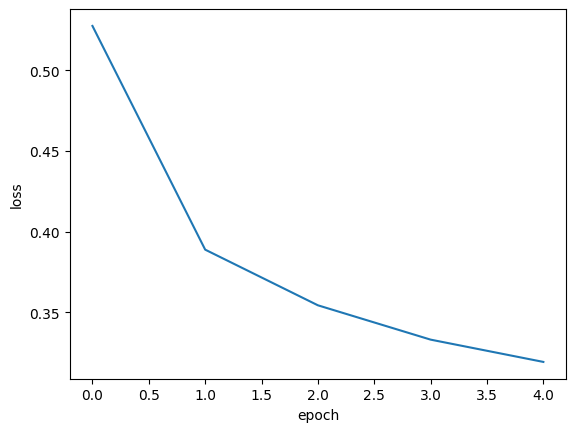

In [56]:
# fit() 메소드 결과를 history 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose= 0)
# verbose = 0 : 훈련과정을 나타내지 않음
# verbose = 1 : 기본값으로 에포크마다 진행막대와 함께 손실 등의 지표가 출력
# verbose = 2 : 진행 막대를 빼고 진행
print('히스토리에 들어 있는 값 : ', history.history.keys())

#그래프로 그리기
# import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

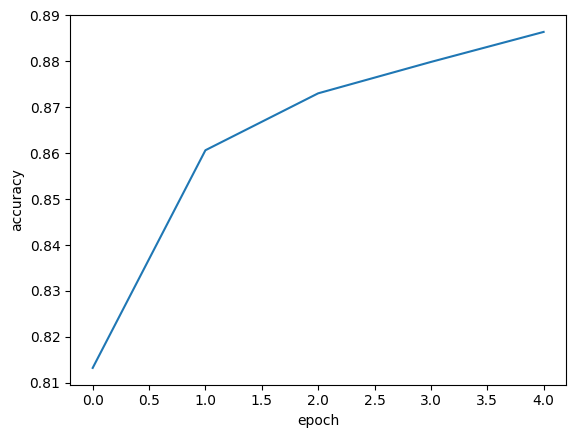

In [57]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

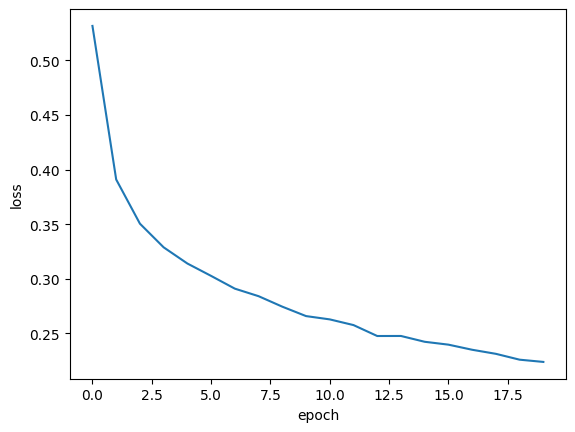

In [58]:
# 에포크 20회로 늘리고 그래프 출력
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#**검증손실**

- 에포크에 따른 과대/과소 적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증세트에 대한 점수도 필요
- So, 앞에서처럼 훈련 세트의 손실만 그려서는 안된다.
- 인공 신경망 모델이 최적화하는 대상 : 정확도X , 손실함수
- 따라서 모델이 잘 훈련된지 판단하려면 **손실 함수의 값을 확인**하는 것이 더 낫다.

In [59]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [60]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


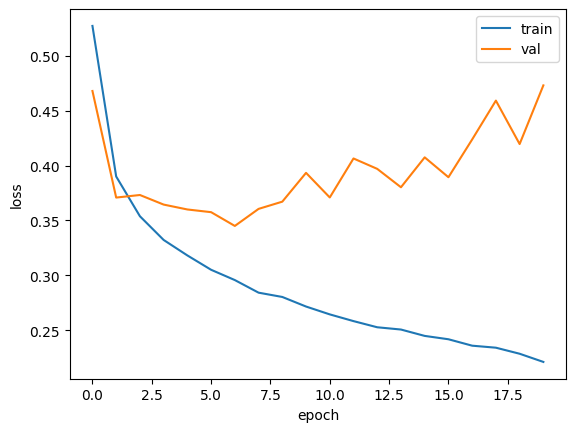

In [61]:
# 과대/과소 적합 문제 조사를 위한 훈련 손실과 검증 손실 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 훈련 손실을 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어짐
- **검증 손실이 상승하는 시점을 뒤로 늦추면** 검증 세트에 대한 손실이 줄어듬 + 검증 세트에 대한 정확도 증가

- 옵티마이저 하이퍼파라미터를 조정해서 과대적합을 완화시킬 수 있는 지 확인

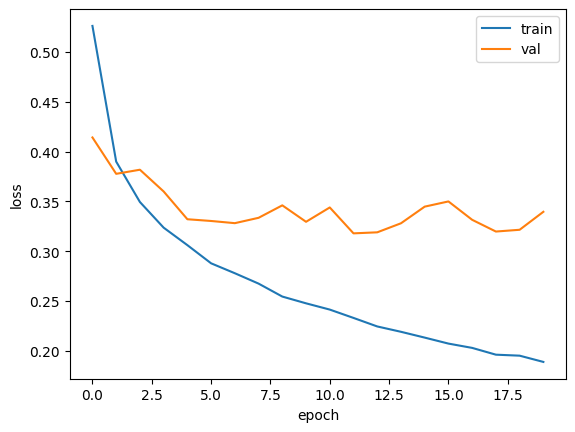

In [62]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#**드롭아웃(dropout)**

드롭아웃 : 제프리 힌턴이 소개한 알고리즘
  - 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서(= 뉴런의 출력을 0으로 만들어) 과대적합을 막음

- 어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃 되어 h2 출력이 없음
- 다른 샘플을 처리할 때는 은닉층의 첫 번째 뉴런이 드롭아웃 되어 h1 출력이 없음
- 뉴런은 랜덤하게 드롭아웃 됨 & **얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 하이퍼파라미터**

**why 드롭아웃이 과대적합을 막음?**
- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존 하는 것을 줄이고 모든 입력에 대해 주의를 기울여야함
- 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것

**다른 해석**
- 앞의 드롭아웃이 적용된 2개의 신경망을 보면 드롭아웃을 적용해 훈련하는 것이 마치 2개의 신경망을 앙상블하는 것처럼 상상 가능
- **앙상블**: 더 좋은 예측 결과를 만들기 위해 여러개의 훈련 모델을 훈련하는 머신러닝 알고리즘

<center>
<img src = https://drive.google.com/uc?id=1xRvUuzEW3QUvZHSw99YVhYIdMR4cTGW8 width='1500' length='500'>
<br>
</center>

```
# 코드로 형식 지정됨
```



In [63]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 평가와 예측에 모델을 사용할 때는 드롭아웃이 적용 되지 않음. 그래서 검증 검수를 마음 편하게 계산 가능

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


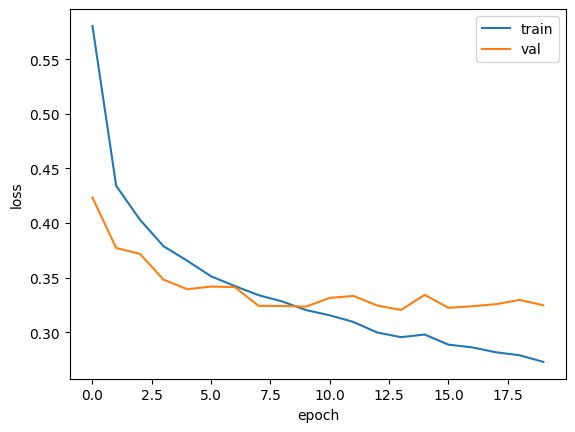

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#**모델 저장과 복원**

20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합됨
- So **과대적합되지 않은 모델을 얻기 위해 에포크를 10으로 하고 다시 훈련**

**저장**
- 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 **save_weights()** 메서드를 제공
- 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만 **파일의 확장자가 '.h5'일 경우 HDF5 포맷**으로 저장

In [65]:
# 모델 저장
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [66]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')
# 모델 저장 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Apr  6 00:40 model-weights.h5
-rw-r--r-- 1 root root 981176 Apr  6 00:40 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**실험**
1. 훈련 하지 않은 새로운 모델 만들고 model-weight.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
2. 아예 model-weight.h5 파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
# 방법 1
